# Computer Vision - Maman 22
imports

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


2022-12-05 11:14:58.159074: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-05 11:14:59.480434: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/vscode/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-12-05 11:14:59.480527: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-05 11:15:01.825893: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerr

Constants

Halper Functions

In [2]:
''' Show image in grayscale
'''
def show_gray_image(image):
    plt.imshow(image, cmap='gray')

In [3]:
''' Show image in color
''' 
def show_color_image(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [4]:
'''  Load image from file 
'''
def load_image(file_name):
    return cv2.imread(file_name, cv2.IMREAD_UNCHANGED)

In [5]:
''' Convert image to grayscale
'''
def convert_to_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


### Question 1

#### <ins>Q1.a </ins>

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


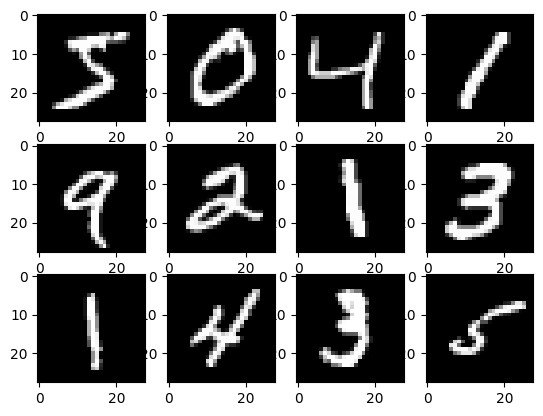

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
#printing the shapes of the vectors 
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))
fig = plt.figure()
for i in range(12):  
    plt.subplot(3,4,i+1)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [17]:
def reshape_set_to_1d(set_to_reshape):
    nsamples, nx, ny = set_to_reshape.shape
    res = set_to_reshape.reshape((nsamples,nx*ny))
    return res

In [48]:
def knn(d2_train_dataset, d2_test_dataset):
   scores = {}
   scores_list = []
   range_k = range(1,10)
   for k in range_k:
      classifier = KNeighborsClassifier(n_neighbors=k)
      classifier.fit(d2_train_dataset, y_train)
      y_pred = classifier.predict(d2_test_dataset)
      scores[k] = metrics.accuracy_score(y_test,y_pred)
      scores_list.append(metrics.accuracy_score(y_test,y_pred))
   return range_k, scores_list

In [49]:
def plot_knn(d2_train_dataset, d2_test_dataset):
    range_k, scores_list = knn(d2_train_dataset, d2_test_dataset)
    plt.plot(range_k,scores_list)
    plt.xlabel("Value of K")
    plt.ylabel("Accuracy")

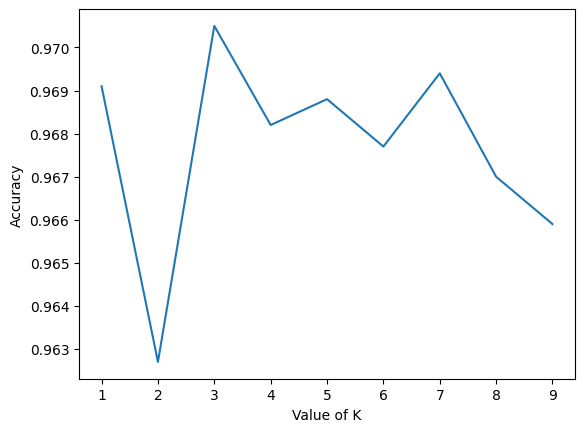

In [50]:
d2_train_dataset = reshape_set_to_1d(x_train)
d2_test_dataset = reshape_set_to_1d(x_test)
plot_knn(d2_train_dataset, d2_test_dataset)

In [51]:
def resahpeImageTo28X28(image):
    return image.reshape([28,28])

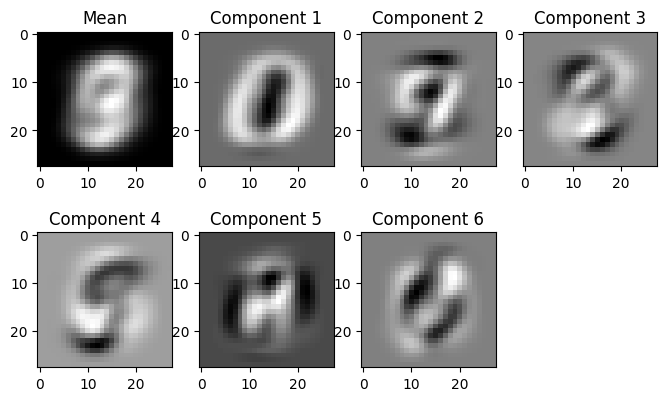

In [52]:
from sklearn.decomposition import PCA

fig = plt.figure(figsize=(8,10))
pca = PCA()
principalComponents = pca.fit(d2_train_dataset)
pcaMean = pca.mean_
subplt = plt.subplot(4,4,1)
subplt.title.set_text("Mean")
plt.imshow(resahpeImageTo28X28(pcaMean), cmap="gray")

for i in range(6):
    notReshapedIm = pca.components_[i]
    subplt = plt.subplot(4,4,i+2)
    subplt.title.set_text("Component "+str(i+1))
    plt.imshow(resahpeImageTo28X28(notReshapedIm), cmap="gray")
plt.show()



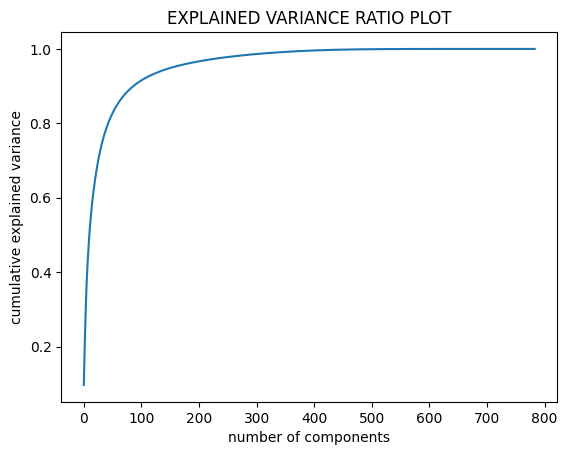

In [53]:
#pca.transform(d2_test_dataset)

cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.title("EXPLAINED VARIANCE RATIO PLOT")
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")
plt.plot(cumsum )
plt.show()

In [54]:
def get_num_of_components(percantage : float):
    pca = PCA(percantage)
    pca.fit(d2_train_dataset)
    return pca.n_components_

res = get_num_of_components(0.95)
print("To get " + str(0.95) + "% variance, needed " + str(res) + " components")
res = get_num_of_components(0.8)
print("To get " + str(0.8) + "% variance, needed " + str(res) + " components")


To get 0.95% variance, needed 154 components
To get 0.8% variance, needed 44 components


In [60]:
def project_to_n_components(n: int, d2_train_dataset, d2_test_dataset):
    pca = PCA(n_components=n) 
    x_train_after_fit  = pca.fit_transform(d2_train_dataset)
    x_test_after_transform  = pca.transform(d2_test_dataset)
    return x_train_after_fit, x_test_after_transform

/tmp/ipykernel_509/865818258.py:15: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend(digit_to_color, labels)


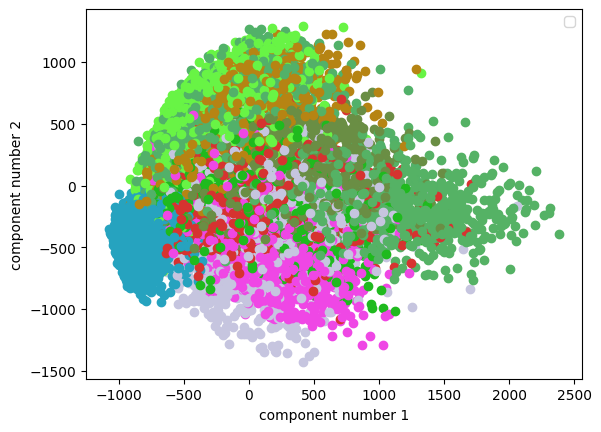

In [61]:

from random import randint

digit_to_color=[]
for i in range(10):
    digit_to_color.append('#%06X' % randint(0, 0xFFFFFF))
x_train_after_fit, x_test_after_transform  = project_to_n_components(2, d2_train_dataset, d2_test_dataset)
num_Of_x_test = len(x_test_after_transform)
for i in range(num_Of_x_test):
    plt.scatter(x_test_after_transform[i][0], x_test_after_transform[i][1], None, digit_to_color[y_test[i]])
labels = []
colors = []
for i in range(10):
    labels.append(str(i))
    colors.append(digit_to_color[i])
plt.legend(digit_to_color, labels)
plt.xlabel('component number 1')
plt.ylabel('component number 2')
plt.show()

(60000, 2)
(10000, 2)


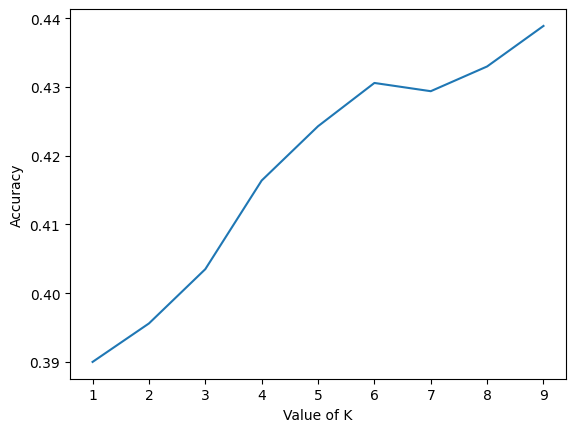

(60000, 10)
(10000, 10)


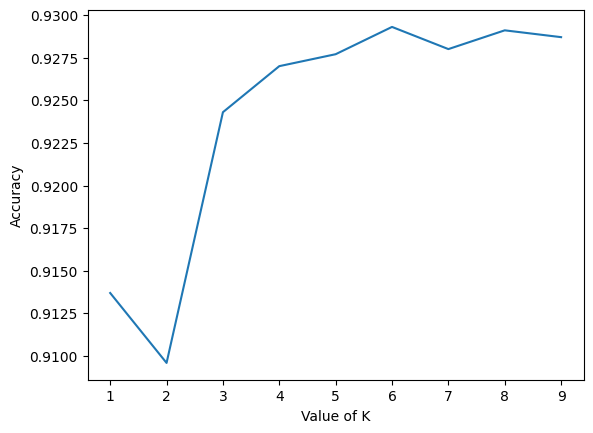

(60000, 20)
(10000, 20)


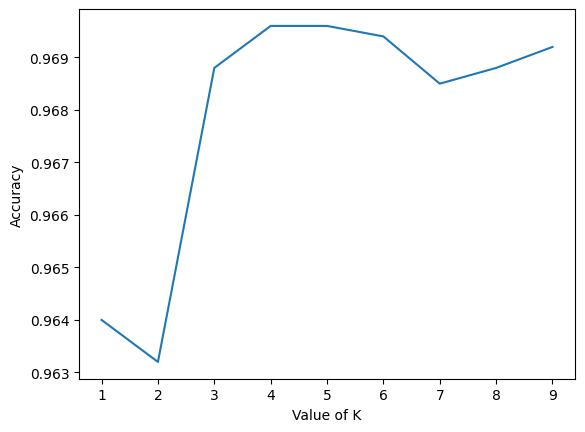

In [64]:
components = [2, 10, 20]
plt.figure()
for n in components:
    x_train_after_fit, x_test_after_transform  = project_to_n_components(n, d2_train_dataset, d2_test_dataset)
    print(x_train_after_fit.shape)
    print(x_test_after_transform.shape)
    plot_knn(x_train_after_fit, x_test_after_transform)
    plt.show()